# DATA PREP

In [1]:
import os

#your dataset folder directory
data_dir = "Data"

#define the 4 training directories class
glioma_tumor_training_dir = os.path.join(data_dir, "training", "glioma_tumor")
meningioma_tumor_training_dir = os.path.join(data_dir, "training", "meningioma_tumor")
normal_training_dir = os.path.join(data_dir,"training", "normal")
pituitary_tumor_training_dir = os.path.join(data_dir,"training", "pituitary_tumor")

print('jumlah data training glioma:', len(os.listdir(glioma_tumor_training_dir)))
print('jumlah data training meningioma:', len(os.listdir(meningioma_tumor_training_dir)))
print('jumlah data training gaada tumor:', len(os.listdir(normal_training_dir)))
print('jumlah data training pituitary:', len(os.listdir(pituitary_tumor_training_dir)))

jumlah data training glioma: 901
jumlah data training meningioma: 913
jumlah data training gaada tumor: 438
jumlah data training pituitary: 844


In [3]:
#define the 4 validation directories class
glioma_tumor_validation_dir = os.path.join(data_dir, "validation", "glioma_tumor")
meningioma_tumor_validation_dir = os.path.join(data_dir, "validation", "meningioma_tumor")
normal_validation_dir = os.path.join(data_dir,"validation", "normal")
pituitary_tumor_validation_dir = os.path.join(data_dir,"validation", "pituitary_tumor")

print('jumlah data validasi glioma:', len(os.listdir(glioma_tumor_validation_dir)))
print('jumlah data validasi meningioma:', len(os.listdir(meningioma_tumor_validation_dir)))
print('jumlah data validasi gaada tumor:', len(os.listdir(normal_validation_dir)))
print('jumlah data validasi pituitary:', len(os.listdir(pituitary_tumor_validation_dir)))

jumlah data validasi glioma: 702
jumlah data validasi meningioma: 913
jumlah data validasi gaada tumor: 438
jumlah data validasi pituitary: 844


# CREATE MODEL

In [4]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [6]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#No need to augment data because it leads to underfitting
TRAINING_DIR ="Data\\training"
training_datagen = ImageDataGenerator(rescale = 1./255.0)

VALIDATION_DIR = "Data\\validation"
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(256,256),
    class_mode='categorical',
    batch_size = 16
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=16
)

Found 3096 images belonging to 4 classes.
Found 2897 images belonging to 4 classes.


In [8]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/25
20/20 [==============================] - 34s 583ms/step - loss: 1.3742 - accuracy: 0.2969 - val_loss: 1.3761 - val_accuracy: 0.3542
Epoch 2/25
20/20 [==============================] - 12s 590ms/step - loss: 1.3743 - accuracy: 0.2875 - val_loss: 1.4005 - val_accuracy: 0.2292
Epoch 3/25
20/20 [==============================] - 10s 491ms/step - loss: 1.3737 - accuracy: 0.2688 - val_loss: 1.3772 - val_accuracy: 0.2917
Epoch 4/25
20/20 [==============================] - 8s 400ms/step - loss: 1.3668 - accuracy: 0.2656 - val_loss: 1.3406 - val_accuracy: 0.3333
Epoch 5/25
20/20 [==============================] - 7s 361ms/step - loss: 1.3433 - accuracy: 0.2875 - val_loss: 1.3819 - val_accuracy: 0.3542
Epoch 6/25
20/20 [==============================] - 7s 355ms/step - loss: 1.3131 - accuracy: 0.3125 - val_loss: 1.2623 - val_accuracy: 0.3958
Epoch 7/25
20/20 [==============================] - 6s 282ms/step - loss: 1.2304 - accuracy: 0.4812 - val_loss: 1.1940 - val_accuracy: 0.5000
Epo

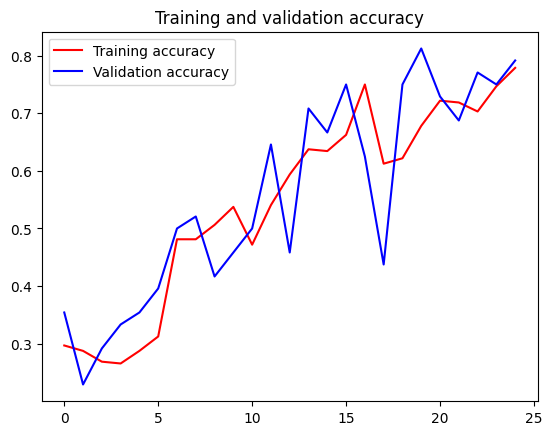

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# PREDICTING

In [11]:
import tkinter as tk
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from PIL import Image, ImageTk
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

#function to call the upload file dialog box
def upload_file():
    global img, predict_path
    f_types = [('Jpg Files', '*.jpg')]
    filename = filedialog.askopenfilename(filetypes=f_types)
    predict_path = filename
    img = ImageTk.PhotoImage(file=filename)
    my_w.destroy()

my_w = tk.Tk()
my_w.geometry("400x300")  
my_w.title('upload your mri image')
my_font1=('times', 18, 'bold')
l1 = tk.Label(my_w,text='upload your mri image',width=30,font=my_font1)  
l1.grid(row=1,column=1)
b1 = tk.Button(my_w, text='Upload File', 
   width=20,command = lambda:upload_file())
b1.grid(row=2,column=1) 

my_w.mainloop()

img = load_img(predict_path, target_size=(256, 256))
x = img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

# Load your model here (make sure you have it saved locally)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])

if classes[0][0] > classes[0][1] and classes[0][0] > classes[0][2] and classes[0][0] > classes[0][3]:
    print('glioma')
elif classes[0][1] > classes[0][0] and classes[0][1] > classes[0][2] and classes[0][1] > classes[0][3]:
    print('meningioma')
elif classes[0][2] > classes[0][0] and classes[0][2] > classes[0][1] and classes[0][2] > classes[0][3]:
    print('normal')
else:
    print('pituitary')

 

[0.92703325 0.05502626 0.01209261 0.00584781]
glioma
